# **Red hat project**

# Part III. Modelling

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
sns.set(rc={'figure.figsize':(15,10)})

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)

## 1. Importing data

In [4]:
X_train = pd.read_csv('./csv_files/red_hat_train.csv', index_col = 'activity_index')
X_test = pd.read_csv('./csv_files/red_hat_test.csv', index_col = 'activity_index')

In [5]:
y_train = np.ravel(pd.read_csv('./csv_files/outcome_train.csv', index_col = 'activity_index'))
y_test = np.ravel(pd.read_csv('./csv_files/outcome_test.csv', index_col = 'activity_index'))

In [6]:
X_train.head()

,char_4_pep,char_5_pep,char_7_pep,char_9_pep,char_10_pep,char_11,char_12,char_14,char_17,char_20,char_25,char_27,char_30,char_31,char_32,char_33,char_34,char_35,char_37,month_pep,year_pep,weekend_flg_pep,year_act,weekend_flg_act
activity_index,,,,,,,,,,,,,,,,,,,,,,,,
"(2, 3769922)",0.360,0.025,0.467,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.576,0.091,0,0,0
"(2, 2255070)",0.469,0.162,0.519,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.477,0.091,0,0,1
"(2, 1102570)",0.535,0.064,0.390,0.249,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,0.450,0.091,0,0,0
"(2, 4143394)",0.360,0.025,0.467,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500,0.189,1,1,1
"(2, 3554173)",0.360,0.025,0.390,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.450,0.091,0,0,0


In [7]:
X_test.head()

,char_4_pep,char_5_pep,char_7_pep,char_9_pep,char_10_pep,char_11,char_12,char_14,char_17,char_20,char_25,char_27,char_30,char_31,char_32,char_33,char_34,char_35,char_37,month_pep,year_pep,weekend_flg_pep,year_act,weekend_flg_act
activity_index,,,,,,,,,,,,,,,,,,,,,,,,
"(2, 2791174)",0.386,0.069,0.898,0.249,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0.346,0.091,1,0,0
"(2, 4219859)",0.360,0.025,0.519,0.249,1,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0.500,0.166,1,1,0
"(2, 2522827)",0.386,0.115,0.467,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.576,0.189,0,1,0
"(2, 908393)",0.360,0.025,0.104,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500,0.554,0,1,0
"(2, 4370791)",0.557,0.055,0.059,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.346,0.091,0,0,0


In [8]:
X_train.shape

(1713886, 24)

## 2. Testing default models

**Three models with default parameters** will be trained in order to pick one model with the best results and perform parameter tuning.
- Random Forest
- XGBoost
- CatBoost

In [9]:
random_seed = 42

In [10]:
rf = RandomForestClassifier()
xg = xgb.XGBClassifier()
cb = CatBoostClassifier()

In [11]:
def make_predictions(classifier, X, y):
    """
    The function takes in a fitted model, dataframe with features and a numpy array with the outcomes and returns
    """
    pred = cross_val_predict(classifier, X, y, cv =5, method = 'predict_proba', verbose = False)
    return pred

In [12]:
def evaluate_scores(y, y_pred, thresh=0.5):
    
    y_pred_vals = (y_pred[:,1] >= thresh).astype('int')
    
    # metrics
    acc = accuracy_score(y, y_pred_vals)
    prec = precision_score(y, y_pred_vals)
    rec = recall_score(y, y_pred_vals)
    f1 = f1_score(y, y_pred_vals)
    roc = roc_auc_score(y, y_pred_vals)
    
    metrics = pd.DataFrame({'metrics': ['accuracy', 'precision','recall','f1','roc_auc'],
                            'scores': [acc, prec, rec, f1, roc]})
    
    return metrics

In [13]:
def evaluate_cmatrix(y, y_pred, thresh = 0.5):
    
    y_pred_vals = (y_pred[:,1] >= thresh).astype('int')
    
    tn, fp, fn, tp = confusion_matrix(y, y_pred_vals).ravel()
    
    cmatrix = pd.DataFrame({'PN': [tn, fn],
                            'PP':[fp, tp]},
                            index = ['TN','TP'])
    
    return cmatrix

In [14]:
def plot_feature_importance(classifier, X, random_seed):
    feature_importance = pd.DataFrame(classifier.feature_importances_,
                                      index = X.columns,
                                      columns = ['importance']).sort_values('importance', ascending= False)
    
    feature_importance['features'] = feature_importance.index
    feature_importance.reset_index(drop=True, inplace=True)
    features = feature_importance['features']
    importances = feature_importance['importance']
    indices = np.argsort(importances)
    
    plt.title("Feature importance")
    plt.barh(range(len(indices)), importances[indices], color = '#93A8AC', align = 'center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Feature importance')
    plt.ylabel('Features')

### 2.1. Random Forest

In [15]:
rf.fit(X_train, y_train)

/home/joannal/Documents/python_projects/python37_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_train_pred  = make_predictions(rf, X_train, y_train)
y_test_pred  = make_predictions(rf, X_test, y_test)

In [17]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [18]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [19]:
metrics_train

,metrics,scores
0,accuracy,0.943
1,precision,0.939
2,recall,0.931
3,f1,0.935
4,roc_auc,0.941


In [20]:
metrics_test

,metrics,scores
0,accuracy,0.921
1,precision,0.910
2,recall,0.912
3,f1,0.911
4,roc_auc,0.920


In [21]:
cm_train

,PN,PP
TN,907148,45851
TP,52501,708386


In [22]:
cm_test

,PN,PP
TN,249338,19457
TP,18861,195749


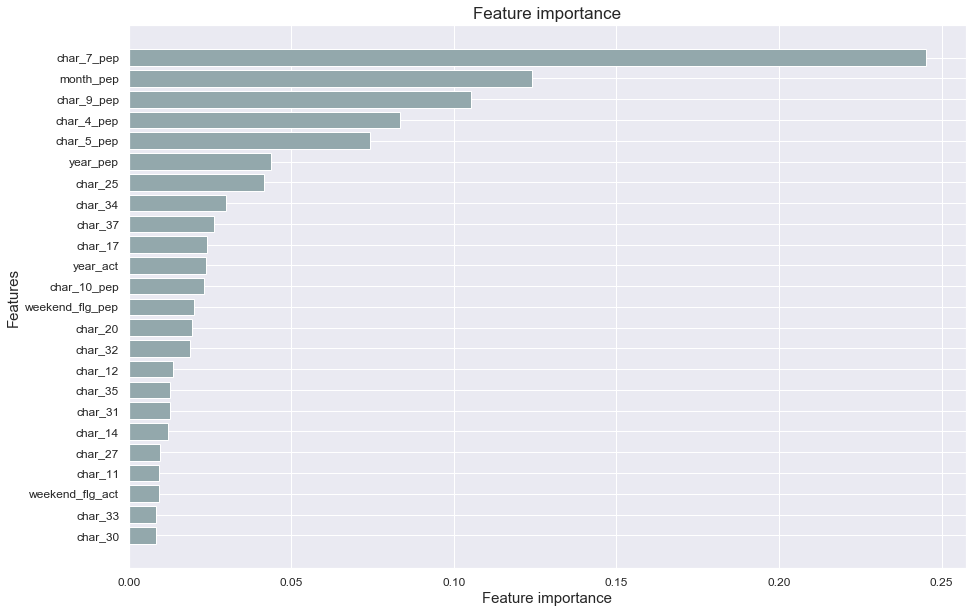

In [23]:
plot_feature_importance(rf, X_train, random_seed)

### 2.2. XGBoost

In [24]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
y_train_pred  = make_predictions(xg, X_train, y_train)
y_test_pred  = make_predictions(xg, X_test, y_test)

In [26]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [27]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [28]:
metrics_train

,metrics,scores
0,accuracy,0.761
1,precision,0.727
2,recall,0.741
3,f1,0.734
4,roc_auc,0.759


In [29]:
metrics_test

,metrics,scores
0,accuracy,0.762
1,precision,0.728
2,recall,0.740
3,f1,0.734
4,roc_auc,0.760


In [30]:
cm_train

,PN,PP
TN,741425,211574
TP,197254,563633


In [31]:
cm_test

,PN,PP
TN,209532,59263
TP,55794,158816


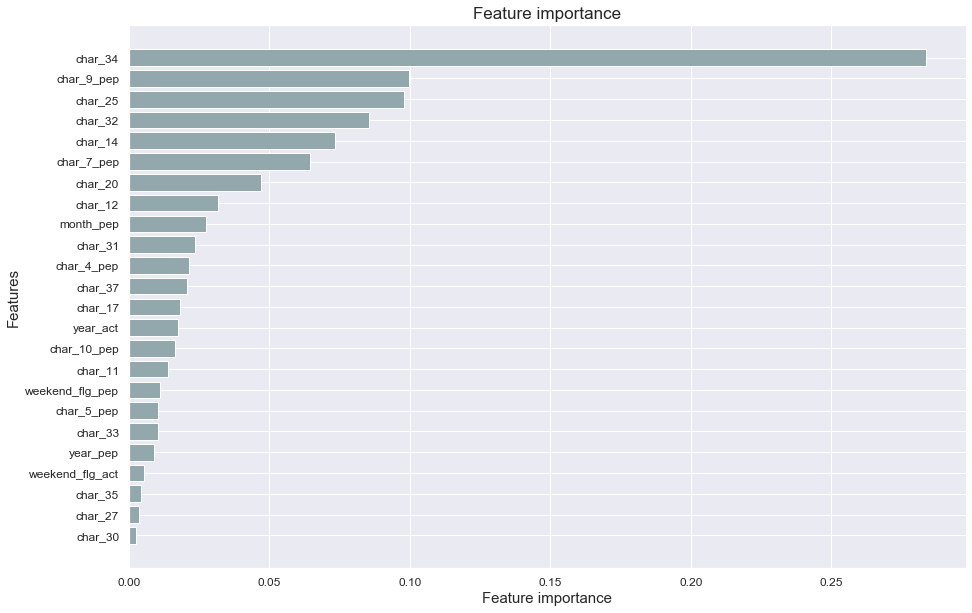

In [32]:
plot_feature_importance(xg, X_train, random_seed)

### 2.3. CatBoost

In [33]:
cb

In [43]:
cb.fit(X_train, y_train)

In [44]:
y_train_pred  = make_predictions(cb, X_train, y_train)
y_test_pred  = make_predictions(cb, X_test, y_test)

In [36]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [37]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [38]:
metrics_train

,metrics,scores
0,accuracy,0.831
1,precision,0.806
2,recall,0.815
3,f1,0.811
4,roc_auc,0.829


In [39]:
metrics_test

,metrics,scores
0,accuracy,0.819
1,precision,0.790
2,recall,0.806
3,f1,0.798
4,roc_auc,0.817


In [40]:
cm_train

,PN,PP
TN,803767,149232
TP,140482,620405


In [41]:
cm_test

,PN,PP
TN,222940,45855
TP,41722,172888


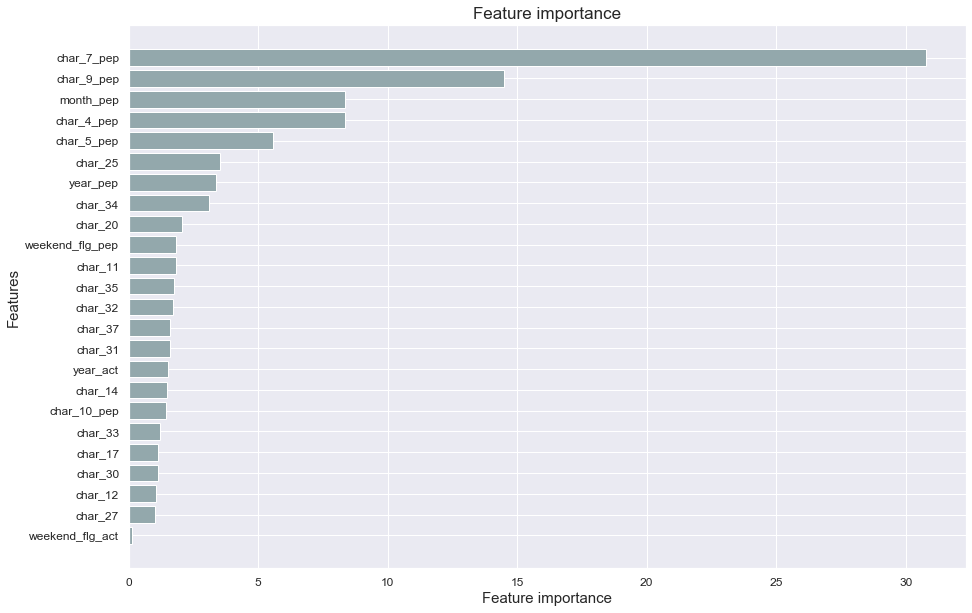

In [42]:
plot_feature_importance(cb, X_train, random_seed)